<a href="https://colab.research.google.com/github/UmitOzteker/TensorFlow-Projects/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow ile Neural Networks Regression





In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Data Oluşturma ve Fit Etme

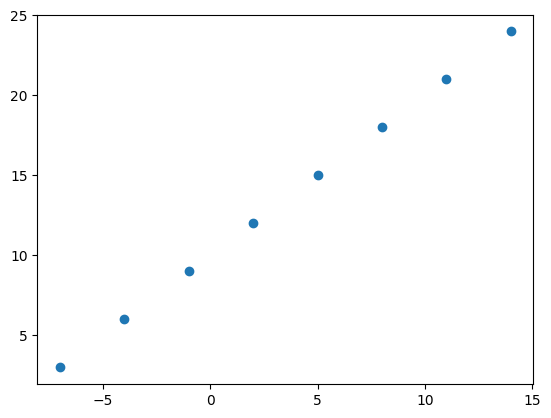

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# X: features/data (inputs)
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#y: labels (outputs)
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Görselleştirme
plt.scatter(X, y)

In [4]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Regresyon input ve output şekilleri

In [5]:
# Bir regresyon modelinin örnek girdi ve çıktı şekilleri
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape =y.shape
input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
# Numpy Arrayleri Tensore dönüştürme
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

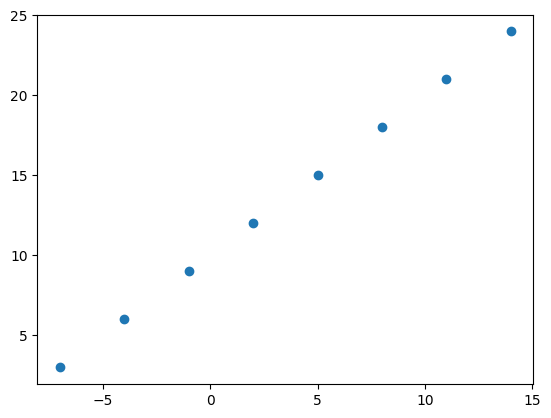

In [10]:
plt.scatter(X, y)

#TensorFlow ile modelleme adımları
TensorFlow'da bir model oluşturmak ve eğitmek için genellikle 3 temel adım vardır.

* Bir model oluşturma - Bir sinir ağının katmanlarını kendiniz bir araya getirin (İşlevsel veya Sıralı API'yi kullanarak) veya önceden oluşturulmuş bir modeli içe aktarın (transfer öğrenimi olarak bilinir).
* Bir modelin derlenmesi - bir model performansının nasıl ölçülmesi gerektiğini (kayıp/metrikler) ve aynı zamanda nasıl iyileştirilmesi gerektiğini (optimizer) tanımlamak.
* Bir modeli fit etmek - modelin verilerdeki kalıpları bulmasına izin vermek (X, y'ye nasıl ulaşır).

In [11]:
tf.random.set_seed(42)

# 1. Sequential API'yi kullanarak bir model oluşturun
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile işlemi
model.compile(loss= tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"]
)

# 3. Modeli fit etme
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 17.8136 - mae: 17.8136
Epoch 2/5
1/1 [==============================] - 0s 29ms/step - loss: 17.5323 - mae: 17.5323
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 17.2511 - mae: 17.2511
Epoch 4/5
1/1 [==============================] - 0s 36ms/step - loss: 16.9698 - mae: 16.9698
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 16.6886 - mae: 16.6886


**Loss**: Derin öğrenmede kayıp fonksiyonu (loss function), bir sinir ağı modelinin eğitim sürecinde kritik bir rol oynar. Bu fonksiyon, modelin tahminleri (çıktılar) ile gerçek veri değerleri (etiketler) arasındaki farkı ölçer. Eğitimin amacı bu kaybı en aza indirmektir, bu da modelin daha önce görmediği veriler üzerinde daha doğru tahminler yapmasını sağlar.

* MAE: Ortalama Mutlak Hata (Mean Absolute Error) anlamına gelir. Derin öğrenmede bir kayıp fonksiyonu (loss function) olarak kullanılır. Kayıp fonksiyonları, bir modelin ne kadar iyi performans gösterdiğini ölçmek için kullanılır ve eğitim sırasında modelin parametrelerini optimize etmeye yardımcı olur. MAE bir modelin tahminleri ile gerçek değerler arasındaki ortalama mutlak farkı hesaplar. Mutlak fark, iki sayı arasındaki farkın mutlak değeridir. Örneğin, 3 ve 7 arasındaki mutlak fark 4'tür

**Optimizer**: bir sinir ağ modelinin eğitim sürecinde kaybı (loss) en aza indirmek için kullanılan bir algoritmadır. Eğitim sırasında, optimizer modelin parametrelerini iteratif olarak günceller ve her güncellemede kaybın azalmasını sağlar.
Farklı türde optimizer'lar mevcuttur:

1. Stokastik Gradyan İnişi (SGD): En basit optimizer'lardan biridir. Her güncellemede, kaybın eğiminin ters yönünde bir adım atar. SGD, modelin parametrelerini (ağırlık ve önyargılar) iteratif bir şekilde güncelleyerek çalışır. Her güncellemede, aşağıdaki adımları uygular:

* Örnek seç: Bir veri kümesinden rastgele bir örnek veya küçük bir örnek grubu (batch) seçer.
* Model tahmini: Seçilen örnekler üzerinde modelin bir tahmin yapmasını sağlar.
* Kayıp hesaplama: Tahmin edilen değer ile gerçek değer arasındaki kaybı hesaplar.
* Gradyan hesaplama: Kaybın modele göre gradyanını hesaplar. Gradyan, kaybın modelin parametrelerine göre nasıl değiştiğini gösteren bir vektördür.
* Parametre güncelleme: Modelin parametrelerini, gradyanın tersi yönünde öğrenme oranı ile çarpılmış bir miktar kadar günceller. Öğrenme oranı, güncellemelerin ne kadar büyük olacağını kontrol eden bir hiperparametredir.

2. Adam: SGD'nin daha karmaşık bir versiyonudur. Daha hızlı ve daha istikrarlı bir eğitim süreci sağlayabilir.

3. RMSProp: SGD'nin bir başka versiyonudur. Adam'a benzer, ancak daha az bellek kullanır.

**Metrics**: Metrikler, bir modelin performansını değerlendirmek için kullanılan ölçümlerdir.

In [12]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Modeli Predict İşlemi
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 166ms/step


array([[-11.896404]], dtype=float32)

In [14]:
y_pred + 11

array([[-0.89640427]], dtype=float32)

# Modeli Geliştirme


In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 763ms/step - loss: 11.3917 - mae: 11.3917
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.2592 - mae: 11.2592
Epoch 3/100
1/1 [==============================] - 0s 34ms/step - loss: 11.1267 - mae: 11.1267
Epoch 4/100
1/1 [==============================] - 0s 23ms/step - loss: 10.9942 - mae: 10.9942
Epoch 5/100
1/1 [==============================] - 0s 29ms/step - loss: 10.8617 - mae: 10.8617
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.7292 - mae: 10.7292
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 10.5967 - mae: 10.5967
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 10.4642 - mae: 10.4642
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.3317 - mae: 10.3317
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 10.1992 - mae: 10.1992
Epoch 11/100
1/1 [==============================

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Doğru Cevap = 27
model.predict([17.0])

1/1 [==============================] - 0s 170ms/step


array([[30.11042]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1),
    ])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.1018 - mae: 13.1018
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 12.6116 - mae: 12.6116
Epoch 3/100
1/1 [==============================] - 0s 23ms/step - loss: 12.1057 - mae: 12.1057
Epoch 4/100
1/1 [==============================] - 0s 39ms/step - loss: 11.5473 - mae: 11.5473
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 10.9031 - mae: 10.9031
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 10.1417 - mae: 10.1417
Epoch 7/100
1/1 [==============================] - 0s 25ms/step - loss: 9.1647 - mae: 9.1647
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 7.8793 - mae: 7.8793
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 6.1701 - mae: 6.1701
Epoch 10/100
1/1 [==============================] - 0s 38ms/step - loss: 4.1534 - mae: 4.1534
Epoch 11/100
1/1 [==============================] - 0s 27ms

In [19]:
# Doğru Cevap = 27
model.predict([17.0])

1/1 [==============================] - 0s 289ms/step


array([[31.536879]], dtype=float32)

# Modeli Geliştirme 2

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.8370 - mae: 13.8370
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 13.7338 - mae: 13.7338
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 13.6306 - mae: 13.6306
Epoch 4/100
1/1 [==============================] - 0s 53ms/step - loss: 13.5275 - mae: 13.5275
Epoch 5/100
1/1 [==============================] - 0s 26ms/step - loss: 13.4245 - mae: 13.4245
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 13.3216 - mae: 13.3216
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 13.2187 - mae: 13.2187
Epoch 8/100
1/1 [==============================] - 0s 27ms/step - loss: 13.1160 - mae: 13.1160
Epoch 9/100
1/1 [==============================] - 0s 31ms/step - loss: 13.0132 - mae: 13.0132
Epoch 10/100
1/1 [==============================] - 0s 33ms/step - loss: 12.9105 - mae: 12.9105
Epoch 11/100
1/1 [==============================] -

In [21]:
# Doğru Cevap 27
model.predict([17.0])

1/1 [==============================] - 0s 252ms/step


array([[30.437958]], dtype=float32)

tf.keras.layers.Dense(100, activation="relu") kodunda 100, yoğun katmandaki nöron sayısını temsil eder. Bu, katmanın 100 farklı nöron içereceği ve her birinin girdi verilerinden gelen sinyalleri işleyip bir çıktı üreteceği anlamına gelir.
* tf.keras.layers.Dense fonksiyonu, Keras'ta yoğun katman oluşturmak için kullanılır.
* İlk parametre, katmandaki nöron sayısını belirtir. Bu durumda, 100 nöron olduğu için katman, 100 boyutlu bir çıktı vektörü üretecektir.
* İkinci parametre, katmanın aktivasyon fonksiyonunu belirtir. "relu", doğrusal olmayan bir aktivasyon fonksiyonudur ve sinyallerin daha karmaşık ilişkileri öğrenmesini sağlar.

Aktivasyon fonksiyonu, yapay sinir ağlarında (YSA) sinyallerin işlenmesini ve modelin karmaşıklığını artırmak için kullanılır. Temel olarak, YSA'daki her nöronun toplama işlemi sonucunda elde ettiği değeri bir sonraki katmana göndermeden önce işlevsel bir hale dönüştürür.

1. Doğrusallık Olmazlık Katmak:

YSA'daki katmanlar arasındaki bağlantılar doğrusaldır. Bu, aktivasyon fonksiyonları kullanılmadan her katmanın bir önceki katmanın doğrusal bir dönüşümü olacağı anlamına gelir. Aktivasyon fonksiyonları, sinyallere doğrusal olmayan bir dönüşüm uygulayarak modelin daha karmaşık ilişkileri öğrenmesini sağlar.

2. Sinyalleri Sınırlamak:

Aktivasyon fonksiyonları, sinyalleri belirli bir aralığa sınırlayabilir. Bu, modelin daha stabil hale gelmesini ve aşırı öğrenmeyi önlemeye yardımcı olur.

Aktivasyon fonksiyonlarının bazı önemli faydaları:

* Doğrusal olmayan modelleri oluşturmayı mümkün kılar.
* Modellerin karmaşıklığını ve öğrenme kapasitesini artırır.
* Aşırı öğrenmeyi önlemeye yardımcı olur.
Sinyalleri normalize etmeye yardımcı olur.

Yaygın olarak kullanılan aktivasyon fonksiyonları:

1. Sigmoid: S-şeklinde bir fonksiyondur ve . genellikle sınıflandırma problemlerinde kullanılır.
2. ReLU: Doğrusal olmayan bir fonksiyondur ve regresyon ve sınıflandırma problemlerinde yaygın olarak kullanılır.
3. Tanh: Hiperbolik tanjant fonksiyonudur ve [-1, 1] aralığında değerler üretir.
4. Softmax: Birden fazla sınıflandırma problemlerinde kullanılır.

# Modeli Değerlendirme

Değerlendirme söz konusu olduğunda şu kelimeleri hatırlamak isteyeceksiniz: "görselleştir, görselleştir, görselleştir."
* Veriler: Hangi verilerle çalışıyorsunuz? Nasıl görünüyor?
* Modelin kendisi: mimari neye benziyor? Farklı şekiller nelerdir?
* Bir modelin eğitimi: Bir model öğrenirken nasıl performans gösterir?
* Bir modelin tahminleri: Bir modelin tahminleri temel gerçeğe (orijinal etiketlere) göre nasıl sıralanır?



In [22]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

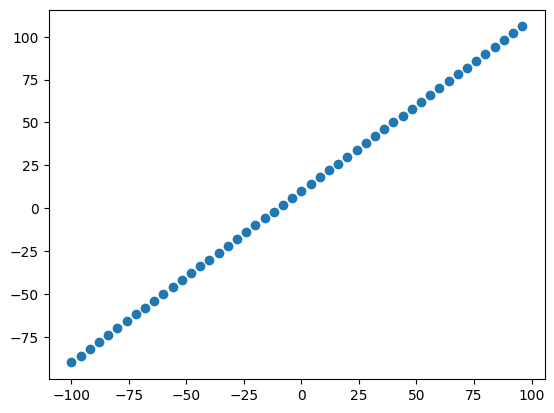

In [24]:
# Datayı görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X, y)

# Verileri Eğitim ve Test Setine Ayırma
Bir makine öğrenimi projesindeki diğer en yaygın ve önemli adımlardan biri, bir eğitim ve test seti (ve gerektiğinde bir doğrulama seti) oluşturmaktır.
* Eğitim seti - model, genellikle mevcut toplam verinin (dönem boyunca çalıştığınız ders materyalleri gibi) %70-80'ini oluşturan bu verilerden öğrenir.
* Doğrulama seti - model, genellikle mevcut toplam verinin %10-15'i olan bu verilere göre ayarlanır (final sınavından önce girdiğiniz deneme sınavı gibi).
* Test seti - model, öğrendiğini test etmek için bu veriler üzerinde değerlendirilir; bu genellikle mevcut toplam verilerin %10-15'idir (dönem sonunda girdiğiniz final sınavı gibi).


In [25]:
# Kaç örneğimiz olduğunu kontrol etme
len(X)

50

In [26]:
# Eğitim ve Test setine bölme
X_train = X[:40] # ilk 40 örnek (verinin %80'i)
y_train = y[:40]

X_test = X[40:] # son 10 örnek (verinin %20'si)
y_test = y[40:]
len(X_train), len(X_test)

(40, 10)

### Datayı Görselleştirme

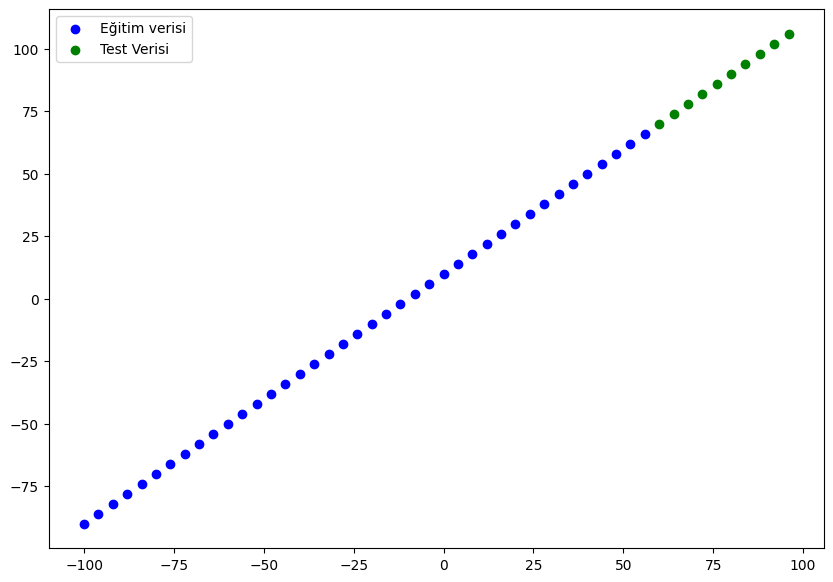

In [27]:
plt.figure(figsize=(10, 7))
# Eğitim Verisi Mavi
plt.scatter(X_train, y_train, c="b", label="Eğitim verisi")

# Test verisi Yeşil
plt.scatter(X_test, y_test, c="g", label="Test Verisi")

plt.legend();

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(X_train, y_train, epochs=100)

# Modeli Görselleştirme

In [30]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

Hata vermesinin sebebi modeli fit etmememiz

In [31]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [32]:
# Otomatik build edilen bir model oluşturma
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])


In [33]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=[1])
])

model1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [34]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 2)                 4         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [36]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Shape = Dense sayısı

Parametre = Shape*2

* Param (Parametre): Makine öğrenmesi modellerinde, param, eğitim süreci boyunca modelin öğrendiği sayısal bir değerdir. Bu değerler, ağdaki nöronlar arasındaki bağlantıları belirler ve ultimately, modelin tahminlerini etkiler.

Bu modelde (sequential_8), dense_12 katmanındaki tek nöronla ilişkilendirilmiş toplam 2 parametre (ağırlık) vardır. Bu ağırlıklar, girdi özelliklerini çıktı nöronuna bağlar ve model, tahmin hatasını en aza indirmek için eğitim sırasında bu ağırlıkları ayarlar.

* Toplam parametreler: modeldeki toplam parametre sayısı.
* Eğitilebilir parametreler: bunlar, modelin eğitilirken güncelleyebileceği parametrelerdir (örüntüler).
* Eğitilemeyen parametreler: bu parametreler eğitim sırasında güncellenmez (bu, transfer öğrenimi sırasında diğer modellerden önceden öğrenilmiş kalıpları getirdiğinizde tipiktir).

In [37]:
# Modeli Eğitme
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 80.7753 - mae: 80.7753
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 79.8981 - mae: 79.8981
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 79.0512 - mae: 79.0512
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 78.1903 - mae: 78.1903
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 77.3451 - mae: 77.3451
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 76.4923 - mae: 76.4923
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 75.6322 - mae: 75.6322
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 74.7395 - mae: 74.7395
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 73.9111 - mae: 73.9111
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 73.0731 - mae: 73.0731
Epoch 11/100
2/2 [==============================] - 0s 9ms

Verbose parametresinin üç olası değeri vardır:

0: Hiçbir bilgi görüntülenmez.

1: Eğitim ilerlemesi hakkında bir ilerleme çubuğu görüntülenir.

2: Her çağda eğitim ilerlemesi hakkında ayrıntılı bilgi görüntülenir.

Verbose parametresi, model.fit fonksiyonu tarafından sağlanan bir özelliktir. Bu parametre, eğitim süreci hakkında ne kadar bilgi görüntüleneceğini kontrol eder.

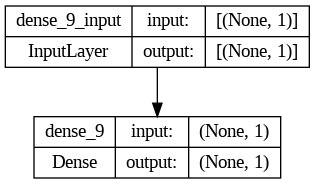

In [38]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

#Model Tahminlerini Görselleştirme

In [39]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 94ms/step


array([[53.196342],
       [56.77366 ],
       [60.350975],
       [63.928288],
       [67.5056  ],
       [71.08292 ],
       [74.66023 ],
       [78.23755 ],
       [81.814865],
       [85.39218 ]], dtype=float32)

In [40]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [41]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

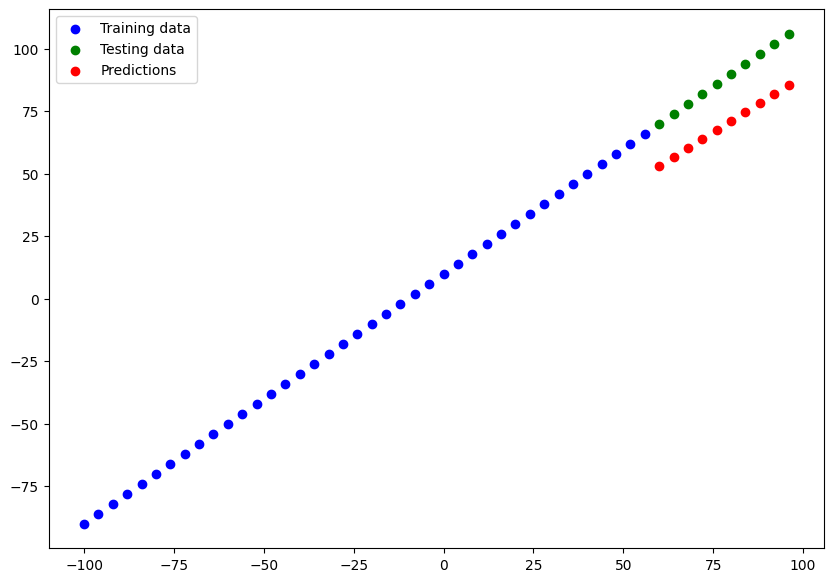

In [42]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

#Model Tahminlerini regression evaluation metrics Kullanarak Geliştirme

In [43]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 140ms/step - loss: 18.7057 - mae: 18.7057


[18.705738067626953, 18.705738067626953]

In [44]:
# Mean absolute error ölçme
mae = tf.keras.losses.MAE(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.803658, 31.226343, 27.649023, 24.071712, 20.4944  , 17.133667,
       14.40386 , 12.30498 , 10.874054, 10.121564], dtype=float32)>

In [45]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.803658, 31.226343, 27.649023, 24.071712, 20.4944  , 17.133667,
       14.40386 , 12.30498 , 10.874054, 10.121564], dtype=float32)>

In [46]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[53.196342],
       [56.77366 ],
       [60.350975],
       [63.928288],
       [67.5056  ],
       [71.08292 ],
       [74.66023 ],
       [78.23755 ],
       [81.814865],
       [85.39218 ]], dtype=float32)>

In [47]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [48]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([53.196342, 56.77366 , 60.350975, 63.928288, 67.5056  , 71.08292 ,
       74.66023 , 78.23755 , 81.814865, 85.39218 ], dtype=float32)>

In [49]:
# Mean absolute error ölçme
mae = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=18.705738>

In [50]:
# Mean Square error Ölçme
mse = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=351.37863>

In [51]:
def mae(y_test, y_pred):
  return tf.keras.losses.MAE(y_test, y_pred)

  def mse(y_test, y_pred):
    return tf.keras.losses.MSE(y_Test,y_pred )

# Modeli Deneyler İle Geliştirme

1. Daha fazla veri
2. Daha geniş model(Daha kompleks model kullanımı)
3. Daha uzun eğitim süresi



In [52]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [53]:
# Random seed belirleme
tf.random.set_seed(42)

# Modeli Oluşturma
model_1= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli compile etme
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Modeli fit etme
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 80.3503 - mae: 80.3503
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 44.9673 - mae: 44.9673
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8417 - mae: 11.8417
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2836 - mae: 9.2836
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1454 - mae: 10.1454
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4143 - mae: 9.4143
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.5602 - mae: 8.5602
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0659 - mae: 9.0659
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.6821 - mae: 18.6821
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.0923 - mae: 10.0923
Epoch 11/100
2/2 [==============================] - 0s 8ms/step -

1/1 [==============================] - 0s 51ms/step


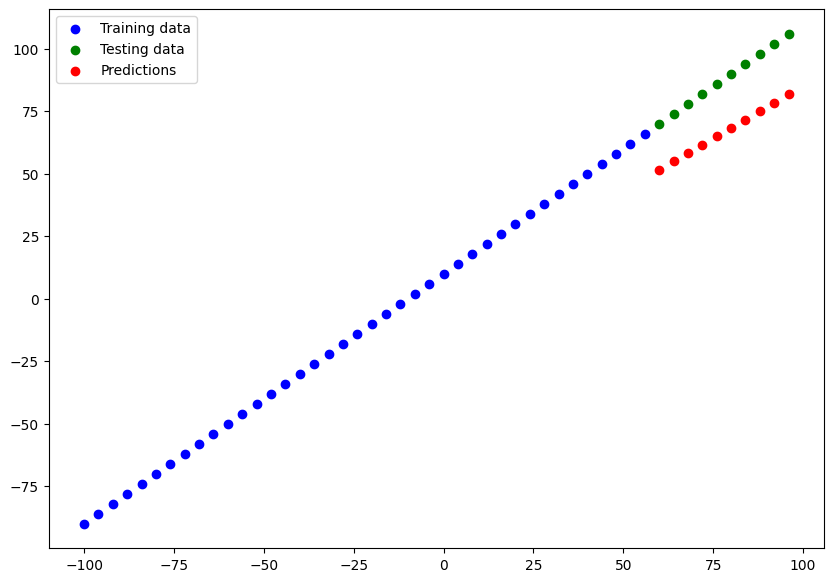

In [54]:
y_pred_1= model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [55]:
mae_1 = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))
mse_1 = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.705738>,
 <tf.Tensor: shape=(), dtype=float32, numpy=351.37863>)

# 2. Model
* 2 layer, 100 epochs eğitim

In [56]:
# Random seed belirleme
tf.random.set_seed(42)

# Modeli Oluşturma
model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)

])

# Modeli compile etme
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Modeli fit etme
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 33.3045 - mae: 33.3045
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 22.0294 - mae: 22.0294
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 19.4606 - mae: 19.4606
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 4.7361 - mae: 4.7361
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 6.6804 - mae: 6.6804
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8526 - mae: 8.8526
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 10.5634 - mae: 10.5634
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2417 - mae: 12.2417
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 30.7374 - mae: 30.7374
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 17.7584 - mae: 17.7584
Epoch 11/100
2/2 [==============================] - 0s 10ms/step

1/1 [==============================] - 0s 120ms/step


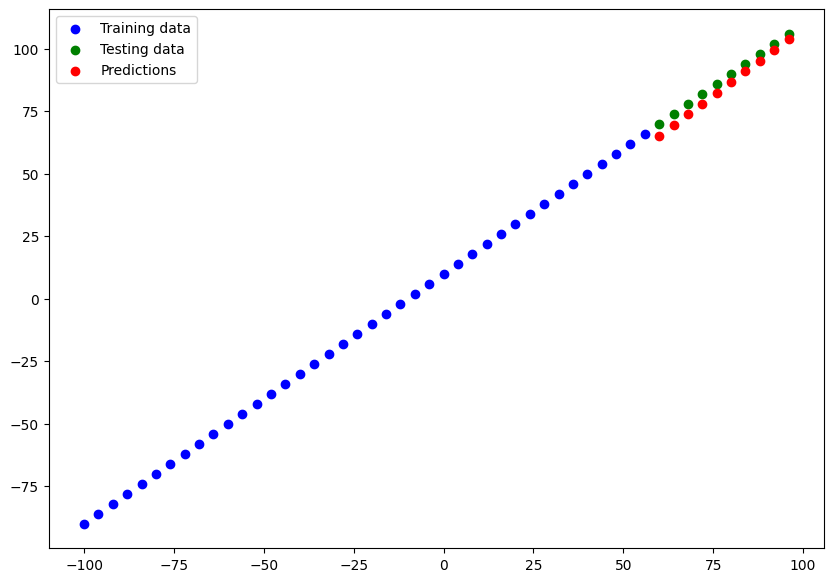

In [57]:
y_pred_2= model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [58]:
# Metric Ölçümü
mae_2 = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.455195>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.675718>)

# Model 3

* 2 layers, 500 epochs eğitim

In [59]:
tf.random.set_seed(42)

# Modeli Oluşturma
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Modeli Fit Etme
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 11ms/step - loss: 40.4769 - mae: 40.4769
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 18.8366 - mae: 18.8366
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 14.2014 - mae: 14.2014
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 8.0932 - mae: 8.0932
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 9.5069 - mae: 9.5069
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 8.8816 - mae: 8.8816
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0437 - mae: 12.0437
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 7.2772 - mae: 7.2772
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 22.7900 - mae: 22.7900
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 12.2232 - mae: 12.2232
Epoch 11/500
2/2 [==============================] - 0s 8ms/step -

1/1 [==============================] - 0s 107ms/step


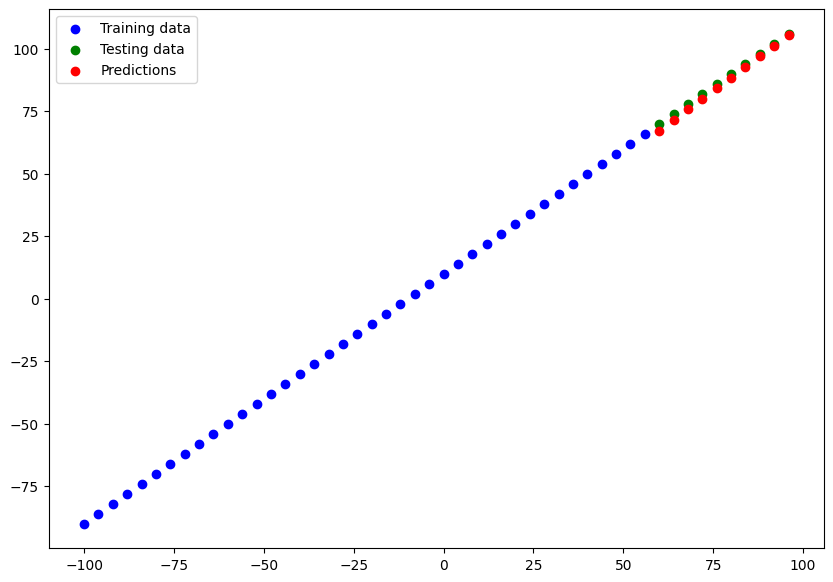

In [60]:
y_pred_3= model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [61]:
mae_3 = tf.keras.losses.MAE(y_test, tf.squeeze(y_pred_3))
mse_3 = tf.keras.losses.MSE(y_test, tf.squeeze(y_pred_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6496918>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.2398727>)

# Deneylerin Sonuçlarını Karşılaştırma

In [62]:
# pandas DataFrame kullanarak sonuçları karşılaştırma
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.705738,351.378632
1,model_2,3.455195,12.675718
2,model_3,1.649692,3.239873


En iyi model_3 çıktı

In [63]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               200       
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Modeli Kaydetme

Modeli kaydetmek için 2 ana format vardır:
1. SavedModel format
2. HDF5 format

In [64]:
# SavedModel format
model_3.save("eniyi_SavedModel_format")

In [65]:
# HDF5 format
model_3.save("eniyi_Save_HDF5_format.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Kaydedilmiş Modeli Yükleme

In [66]:
# SavedModel formatı yükleme
loaded_SavedModel_format = tf.keras.models.load_model("eniyi_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               200       
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               200       
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
# model_3 ve SavedModel format modelinin sonuçlarının karşılaştırılaması
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [69]:
# .h5 format kullanan modelin yüklenmesi
loaded_h5_model = tf.keras.models.load_model("eniyi_Save_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               200       
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [70]:
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_3_preds

1/1 [==============================] - 0s 94ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Daha Büyük Örnek

In [71]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
# insuranse Verisini okuma
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [73]:
#One hot-encoding İşlemi
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [74]:
# X ve y değerlerini oluşturma
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [75]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [76]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [77]:
# Eğitim ve Test setleri oluşturma
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [79]:
# Neural Network Oluşturma
tf.random.set_seed(42)

#Model Oluşturma
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
# Modeli Compile Etme
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# Modeli Fit Etme
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13296.6055 - mae: 13296.6055
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 12449.4258 - mae: 12449.4258
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 12184.6846 - mae: 12184.6846
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 12113.9209 - mae: 12113.9209
Epoch 5/500
34/34 [==============================] - 0s 3ms/step - loss: 12008.6016 - mae: 12008.6016
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 11839.4639 - mae: 11839.4639
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 11544.5869 - mae: 11544.5869
Epoch 8/500
34/34 [==============================] - 0s 4ms/step - loss: 11065.2842 - mae: 11065.2842
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 10457.3027 - mae: 10457.3027
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 9810.583

In [80]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 5ms/step - loss: 8524.0420 - mae: 8524.0420


[8524.0419921875, 8524.0419921875]

In [81]:
y_train.median()

9575.4421

In [82]:
# Neural Network Oluşturma
tf.random.set_seed(42)

#Model Oluşturma
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])
# Modeli Compile Etme
insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.01),
                        metrics=["mae"])
# Modeli Fit Etme
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
34/34 [==============================] - 1s 3ms/step - loss: 13343.2812 - mae: 13343.2812
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 13339.5000 - mae: 13339.5000
Epoch 3/500
34/34 [==============================] - 0s 3ms/step - loss: 13334.7129 - mae: 13334.7129
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13328.4746 - mae: 13328.4746
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 13320.5039 - mae: 13320.5039
Epoch 6/500
34/34 [==============================] - 0s 3ms/step - loss: 13310.5293 - mae: 13310.5293
Epoch 7/500
34/34 [==============================] - 0s 3ms/step - loss: 13298.4668 - mae: 13298.4668
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 13284.2598 - mae: 13284.2598
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 13267.8594 - mae: 13267.8594
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 13249.30

In [83]:
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8607.4688 - mae: 8607.4688


[8607.46875, 8607.46875]

In [84]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(lr=0.001),
                          metrics=["mae"])

insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13340.6592 - mae: 13340.6592
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13325.7646 - mae: 13325.7646
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 13295.1846 - mae: 13295.1846
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13234.8643 - mae: 13234.8643
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13128.7969 - mae: 13128.7969
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 12962.2529 - mae: 12962.2529
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12735.8584 - mae: 12735.8584
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12475.9678 - mae: 12475.9678
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12241.5430 - mae: 12241.5430
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 12120.83

In [85]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8627.8945 - mae: 8627.8945


[8627.89453125, 8627.89453125]

In [86]:
tf.random.set_seed(42)

insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history=insurance_model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13341.4805 - mae: 13341.4805
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13328.5967 - mae: 13328.5967
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13305.5430 - mae: 13305.5430
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13264.3535 - mae: 13264.3535
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13197.6855 - mae: 13197.6855
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13098.3730 - mae: 13098.3730
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12962.4834 - mae: 12962.4834
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12792.4023 - mae: 12792.4023
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12600.1562 - mae: 12600.1562
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 12403.01

In [87]:
insurance_model_4.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8562.8203 - mae: 8562.8203


[8562.8203125, 8562.8203125]

Text(0.5, 0, 'epochs')

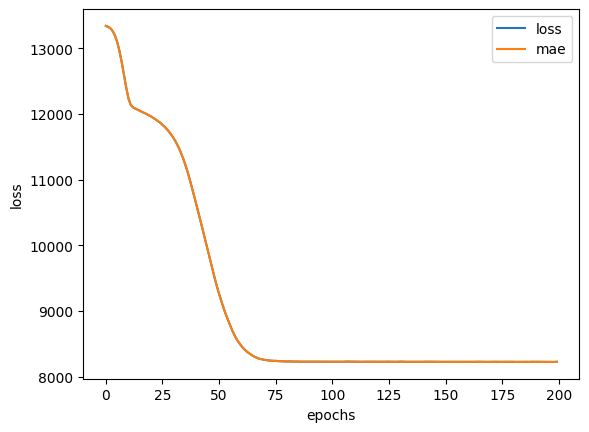

In [88]:
# Plot History
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")